## 8.2 Exercise

This first step to import NumPy to handle arrays and perform efficient matrix operations, then define and solve the linear system $\mathbf{A}\mathbf{x}=\mathbf{b}$.

In [1]:
import numpy as np

# Define the coefficient matrix A and the constant vector b
A = np.array([
    [27, -10, 4, -29],
    [-16, 5, -2, 18],
    [-17, 4, -2, 20],
    [-7, 2, -1, 8]
])

b = np.array([1, -1, 0, 1])

# Solve the system Ax = b for x
x = np.linalg.solve(A, b)

# Print the solution vector x
print("The solution vector x is:\n", x)

The solution vector x is:
 [10.  3. -9.  7.]


NumPy defines the $2 \times 2$ transformation matrix $\mathbf{A}$ and the vector $\mathbf{x}$. The matrix-vector product is computed to find the resulting transformed vector, $T(\mathbf{x})$.

In [2]:
# Define the matrix A for the linear transformation T
sqrt2_half = np.sqrt(2) / 2
A_transform = np.array([
    [sqrt2_half, -sqrt2_half],
    [sqrt2_half, sqrt2_half]
])

# Define the vector x
x_vector = np.array([2, -2])

# Calculate T(x) = A * x
Tx = A_transform @ x_vector

# Print the result.
print("A_transform is:\n", A_transform)
print("\nx_vector is:\n", x_vector)
print("\nT(x) = A * x is (rounded to 4 decimal places):\n", np.round(Tx, 4))

A_transform is:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

x_vector is:
 [ 2 -2]

T(x) = A * x is (rounded to 4 decimal places):
 [2.8284 0.    ]


Matplotlib will visualize the transformation, plotting the unit circle and standard basis vectors to see their transformation after the matrix $\mathbf{A}$ is applied.

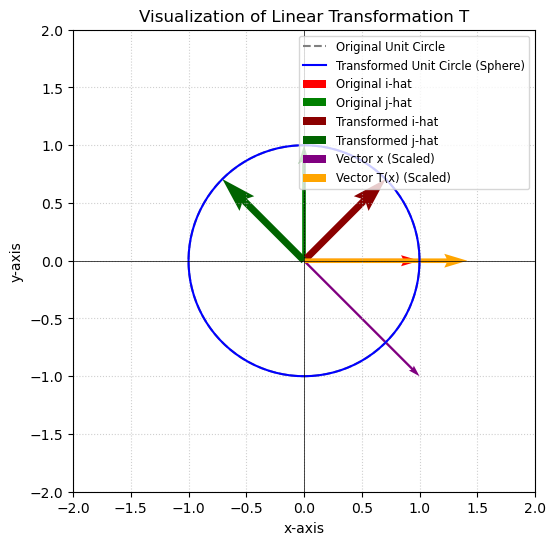

In [3]:
import matplotlib.pyplot as plt

# 1. Setup the 2x2 matrix A and the result Tx
sqrt2_half = np.sqrt(2) / 2
A_transform = np.array([
    [sqrt2_half, -sqrt2_half],
    [sqrt2_half, sqrt2_half]
])
x_vector = np.array([2, -2])
Tx = np.array([2.8284, 0.0]) # Using the result from the previous step

# 2. Create the unit circle
t = np.linspace(0, 2*np.pi, 100)
unit_circle = np.array([np.cos(t), np.sin(t)])

# 3. Apply the transformation A to the unit circle
transformed_circle = A_transform @ unit_circle

# 4. Define the standard basis vectors (i-hat and j-hat)
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

# 5. Apply the transformation A to the basis vectors
transformed_i = A_transform @ i_hat
transformed_j = A_transform @ j_hat

# 6. Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the original unit circle
ax.plot(unit_circle[0], unit_circle[1], linestyle='--', color='gray', label='Original Unit Circle')

# Plot the transformed circle
ax.plot(transformed_circle[0], transformed_circle[1], color='blue', label='Transformed Unit Circle (Sphere)')

# Plot the standard basis vectors
ax.quiver(0, 0, i_hat[0], i_hat[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.008, label='Original i-hat')
ax.quiver(0, 0, j_hat[0], j_hat[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.008, label='Original j-hat')

# Plot the transformed basis vectors
ax.quiver(0, 0, transformed_i[0], transformed_i[1], angles='xy', scale_units='xy', scale=1, color='darkred', width=0.015, label='Transformed i-hat')
ax.quiver(0, 0, transformed_j[0], transformed_j[1], angles='xy', scale_units='xy', scale=1, color='darkgreen', width=0.015, label='Transformed j-hat')

# Plot the vector x and T(x) (scaled by 0.5 to fit nicely on the plot)
scale_factor = 0.5
ax.quiver(0, 0, x_vector[0]*scale_factor, x_vector[1]*scale_factor, angles='xy', scale_units='xy', scale=1, color='purple', width=0.005, label='Vector x (Scaled)') 
ax.quiver(0, 0, Tx[0]*scale_factor, Tx[1]*scale_factor, angles='xy', scale_units='xy', scale=1, color='orange', width=0.010, label='Vector T(x) (Scaled)')


# Set limits and aspect ratio
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend(loc='upper right', fontsize='small')
ax.set_title('Visualization of Linear Transformation T')

plt.show()

First define the $3 \times 3$ matrix $\mathbf{A}$ and the vector $\mathbf{v}_1$. Then calculate the product $\mathbf{A}\mathbf{v}_1$ using the matrix multiplication operator @ to verify if $\mathbf{v}_1$ is an eigenvector.

In [4]:
# Define the 3x3 matrix A
A_eigen = np.array([
    [4, 0, 1],
    [-1, -6, -2],
    [5, 0, 0]
])

# Define the potential eigenvector v1
v1 = np.array([1, 2, 3])

# Calculate the product A * v1
Av1 = A_eigen @ v1

print("The product A * v1 is:\n", Av1)

The product A * v1 is:
 [  7 -19   5]


Vector $\mathbf{v}_1$ is not an eigenvector since $\mathbf{A}\mathbf{v}_1$ is not a scalar multiple of $\mathbf{v}_1$. Now I will test $\mathbf{v}_2$ by calculating the product $\mathbf{A}\mathbf{v}_2$.

In [5]:
# Define the potential eigenvector v2
v2 = np.array([0, 1, 0])

# Calculate the product A * v2
# Using the A_eigen matrix
Av2 = A_eigen @ v2 

print("The product A * v2 is:\n", Av2)

The product A * v2 is:
 [ 0 -6  0]


The product $\mathbf{A}\mathbf{v}_2$ is $-6$ times the original vector $\mathbf{v}_2$, which confirms $\mathbf{v}_2$ is an eigenvector with eigenvalue equal to -6. Now I will use the np.linalg.eig function to compute all eigenvalues and their corresponding eigenvectors for the matrix $\mathbf{A}$.

In [6]:
# Use numpy to compute eigenvalues (w) and eigenvectors (v)
# w is the array of eigenvalues
# v is the matrix where the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
eigenvalues, eigenvectors = np.linalg.eig(A_eigen)

print("Eigenvalues (lambda) are:\n", eigenvalues)
print("\nEigenvectors (v) are (each column corresponds to an eigenvalue):\n", eigenvectors)

Eigenvalues (lambda) are:
 [-6.  5. -1.]

Eigenvectors (v) are (each column corresponds to an eigenvalue):
 [[ 0.          0.69431384 -0.18493168]
 [ 1.         -0.18935832 -0.33287702]
 [ 0.          0.69431384  0.9246584 ]]


I have found all the eigenvalues and eigenvectors of $\mathbf{A}$. Now I will move to the data science section and load the video game data to create a scatterplot of user scores versus critic scores.

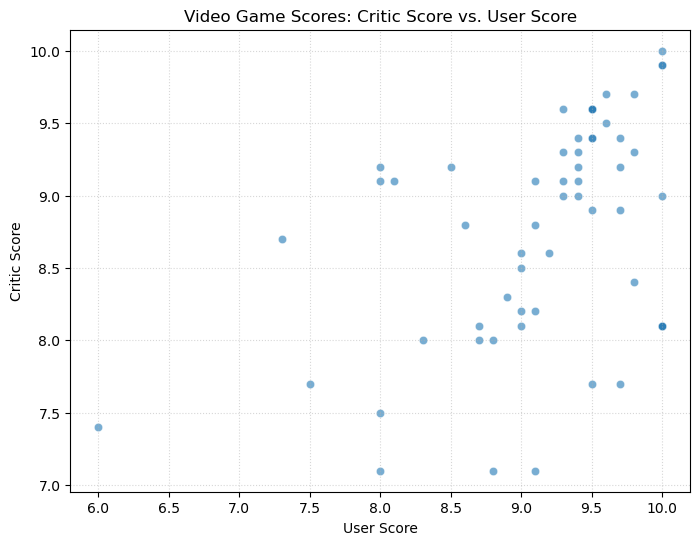

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the columns 
USER_SCORE_COL = 'user_score'
CRITIC_SCORE_COL = 'critic_score'

# Load the data
try:
    df = pd.read_csv('video_game_data.csv')
except NameError:
    df = pd.read_csv('video_game_data.csv')
except FileNotFoundError:
    print("Error: 'video_game_data.csv' not found. Please ensure the file is in the correct directory.")

# Make a scatterplot of user scores (x-axis) versus critics scores (y-axis)
plt.figure(figsize=(8, 6))
plt.scatter(df[USER_SCORE_COL], df[CRITIC_SCORE_COL], alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('Video Game Scores: Critic Score vs. User Score')
plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

Matplotlib's quiver function will manually sketch the approximate directions of the first and second Principal Components (PCs) onto the scatterplot, demonstrating the axes of maximum and minimum variance.

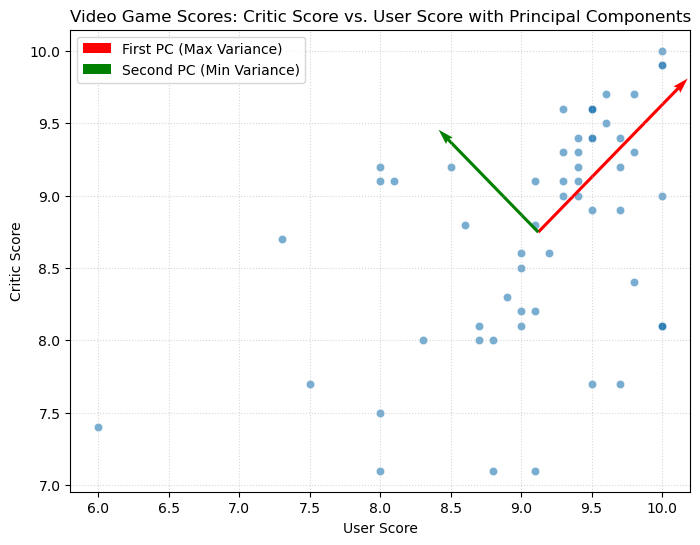

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Setup Data (Same as before) ---
USER_SCORE_COL = 'user_score'
CRITIC_SCORE_COL = 'critic_score'

# Re-load data 
df = pd.read_csv('video_game_data.csv')

# --- Plotting 4(a) ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df[USER_SCORE_COL], df[CRITIC_SCORE_COL], alpha=0.6, edgecolors='w', linewidth=0.5)

ax.set_title('Video Game Scores: Critic Score vs. User Score with Principal Components')
ax.set_xlabel('User Score')
ax.set_ylabel('Critic Score')
ax.grid(True, linestyle=':', alpha=0.5)

# --- Sketching Principal Components 4(b) ---

# Find the center of the data (mean) for the origin of the arrows
center_x = df[USER_SCORE_COL].mean()
center_y = df[CRITIC_SCORE_COL].mean()

# 1. First Principal Component (PC1)
# PC1 captures the maximum variance, following the longest stretch of data.
# In this plot, the data generally trends from bottom-left to top-right.
# Approximate a unit vector along this diagonal.
pc1_direction = np.array([1, 1]) / np.sqrt(2) 
pc1_scale = 1.5  # Scale for visibility

# 2. Second Principal Component (PC2)
# PC2 is orthogonal (perpendicular) to PC1, capturing the minimum variance.
# For a PC1 of [1, 1], the orthogonal vector is [-1, 1] (or [1, -1]).
pc2_direction = np.array([-1, 1]) / np.sqrt(2)
pc2_scale = 1.0 # Scale for visibility

# Plot PC1 (Maximum Variance)
ax.quiver(center_x, center_y, 
          pc1_direction[0] * pc1_scale, pc1_direction[1] * pc1_scale, 
          angles='xy', scale_units='xy', scale=1, color='red', width=0.005, 
          label='First PC (Max Variance)')

# Plot PC2 (Minimum Variance)
ax.quiver(center_x, center_y, 
          pc2_direction[0] * pc2_scale, pc2_direction[1] * pc2_scale, 
          angles='xy', scale_units='xy', scale=1, color='green', width=0.005, 
          label='Second PC (Min Variance)')

# Re-adjust limits if necessary after adding arrows, but current limits are fine.
ax.legend()
plt.show()

This exercise successfully applied core concepts from linear algebra and numerical analysis. I have solved a system of linear equations using NumPy's solver, demonstrated that the transformation $T$ is a $45^\circ$ counter-clockwise rotation, and identified the eigenvalues and eigenvectors of a $3 \times 3$ matrix. Finally, I performed the initial step of Principal Component Analysis (PCA) by visualizing the relationship between critic and user scores and sketching the axes of maximum and minimum variance.